In [23]:
!pip install h5py
import torch
print(torch.cuda.is_available())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 40.2 MB/s eta 0:00:00
True


In [43]:
from src import analyze_mat_file
file_path = "/home/smatsubara/documents/airlift/data/experiments/rawsignal/P20240726-1600.mat"
analyze_mat_file(file_path)

Analyzing: /home/smatsubara/documents/airlift/data/experiments/rawsignal/P20240726-1600.mat
File size: 3973.64 MB
Successfully loaded .mat file

=== File Metadata ===
__header__: b'PicoScope 7 T&M, Created on: 2025?5?8?'
__version__: 1.0
__globals__: []

=== Variables ===

Variable 1: Tstart
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float32
  Min: 0.0
  Max: 0.0
  Mean: 0.0

Variable 2: Tinterval
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: float64
  Min: 1.9199999812258284e-08
  Max: 1.9199999812258284e-08
  Mean: 1.9199999812258284e-08

Variable 3: ExtraSamples
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 0
  Max: 0
  Mean: 0.0

Variable 4: RequestedLength
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variable 5: Length
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int32
  Min: 260416669
  Max: 260416669
  Mean: 260416669.0

Variab

/home/smatsubara/documents/airlift/.venv/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


  Mean: nan

Variable 8: TDX2
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Variable 9: TDX3
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -2.3972601890563965
  Max: 2.152641773223877
  Mean: 0.004267964977771044

Variable 10: TDX1_enlarged
  Type: <class 'numpy.ndarray'>
  Shape: (1, 260416673)
  Data type: float32
  Min: -inf
  Max: inf
  Mean: nan

Total variables: 10

=== Nested Structures ===

Structure of: Tstart
Array: shape=(1, 1), dtype=float32

Structure of: Tinterval
Array: shape=(1, 1), dtype=float64

Structure of: ExtraSamples
Array: shape=(1, 1), dtype=int32

Structure of: RequestedLength
Array: shape=(1, 1), dtype=int32

Structure of: Length
Array: shape=(1, 1), dtype=int32

Structure of: Version
Array: shape=(1,), dtype=<U11

Structure of: TDX1
Array: shape=(1, 260416673), dtype=float32

Structure of: TDX2
Array: shape=(1, 260416673), dtype=float32

Structure of: TDX

In [2]:
from src import convert_mat2npy
import numpy as np
import os
import scipy.io as sio
file_path = "/home/smatsubara/documents/airlift/data/experiments/rawsignal/P20241007-1013.mat"
output_dir = "/home/smatsubara/documents/airlift/data/experiments/processed"  # Change to your desired directory
processed_data,fs=convert_mat2npy(file_path,start_time=0.0,duration=5.0,amplitude_threshold=2,window_width=0.1e-3,signal_key="TDX1")
# If you want to save fs and other metadata together with processed_data, it is common to use a dictionary and save it as a .npz file.
# You should modify convert_mat2npy to return fs and any other metadata you need.
# Here, as an example, we use a dummy value for fs. In practice, get fs from the return value of convert_mat2npy.
mat_data=sio.loadmat(file_path)
keys=list(mat_data.keys())
print(fs)
print(keys)
# Prepare a dictionary to save both data and metadata
save_dict = {
    "processed_data": processed_data,
    "fs": fs,
    "original_keys": keys,
    # Add other metadata here if needed
}

base_filename = os.path.splitext(os.path.basename(file_path))[0]
save_path = os.path.join(output_dir, f"{base_filename}_processed.npz")
np.savez(save_path, **save_dict)
print(f"Processed data and metadata saved to: {save_path}")

Loading data...
Loading successful
Using device: cuda
Number of detected triggers: (14988,)
triggers.shape: (14988,)
signal_chunk.shape: (260416669,)
fs: 52083333.842615336
arranged_pulses_tdx1.shape: (14988, 5208, 1)
arranged_pulses_tdx1_enlarged.shape: (14988, 5208, 1)
arranged_pulses.shape: (14988, 5208, 4, 1)
52083333.842615336
['__header__', '__version__', '__globals__', 'Tstart', 'Tinterval', 'ExtraSamples', 'RequestedLength', 'Length', 'Version', 'TDX1', 'TDX2', 'TDX3', 'TDX1_enlarged']
Processed data and metadata saved to: /home/smatsubara/documents/airlift/data/experiments/processed/P20241007-1013_processed.npz


In [2]:
import numpy as np
import scipy.io as sio
import torch
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt

file_path = "/home/smatsubara/documents/airlift/data/experiments/processed/P20241007-0959_processed.npz"

def visualize_pulse_from_npz(npz_file_path, pulse_index=100, channel_index=0):
    """
    Load processed data from an .npz file and visualize a specific pulse waveform.

    Parameters
    ----------
    npz_file_path : str
        Path to the .npz file containing processed data.
    pulse_index : int, optional
        Index of the pulse to visualize (default is 100).
    channel_index : int, optional
        Index of the channel to visualize (default is 0).

    Returns
    -------
    None
    """
    # Load the npz file
    data = np.load(npz_file_path)
    # Print the keys in the npz file for better readability
    #print("Keys in npz file:", list(data.keys()))
    # Extract the processed_data array
    processed_data = data["processed_data"]
    print("processed_data shape:", processed_data.shape)

    # Extract the specified pulse waveform from the processed_data array with maximum precision
    # Ensure the data type is float64 for highest numerical accuracy
    pulse = np.array(processed_data[pulse_index, :, channel_index], dtype=np.float64)
    #print("Pulse shape:", pulse.shape)
    N = len(pulse)
    fs = data["fs"]
    t = np.arange(N) / fs * 1e6  # Time in microseconds
    #print(fs)
    # Plot only the range where x-axis is from 60 to 100
    start_idx = 0
    end_idx = 5500
    if end_idx > N:
        end_idx = N
    path = "/home/smatsubara/documents/airlift/data/sandbox/tmp"
    fig, ax = plt.subplots(figsize=(8, 4))  # 新しいFigureとAxesを作成
    # Find the maximum value and its index within the specified range
    max_value = np.max(pulse[start_idx:end_idx])
    max_idx = np.argmax(pulse[start_idx:end_idx]) + start_idx  # Absolute index in the pulse array

    # Highlight the maximum value on the plot
    ax.plot(t[max_idx], pulse[max_idx], 'ro', label=f"Max: {max_value:.3f} at idx {max_idx}")
    ax.legend()
    # Save the pulse waveform as a .mat file for further analysis
    from scipy.io import savemat
    mat_save_path = f"{path}/pulse_{pulse_index}.mat"
    # Prepare the data dictionary for saving
    mat_dict = {
        "pulse": pulse[start_idx:end_idx],
        "t_us": t[start_idx:end_idx],
        "pulse_index": pulse_index,
        "channel_index": channel_index,
        "fs": fs
    }
    savemat(mat_save_path, mat_dict)
    print(f"Saved .mat file: {mat_save_path}")
    # Print the maximum value and its index (signal id)
    print(f"Maximum value in the specified range: {max_value:.3f} at index {max_idx}")
    ax.plot(t[start_idx:end_idx], pulse[start_idx:end_idx])
    ax.set_title(f"Pulse waveform ({pulse_index}th, channel {channel_index})")
    ax.set_xlabel("Time [μs]")
    ax.set_ylabel("Amplitude")
    ax.grid(True)
    
    save_path = f"{path}/pulse_{pulse_index}.png"
    fig.savefig(save_path, bbox_inches='tight')
    print(f"Saved figure: {save_path}")
    plt.close(fig)

# pulse_indexを0から10まで連続で信号波形画像を生成
for pulse_index in range(4000, 4005):
    print(f"--- pulse_index: {pulse_index} ---")
    visualize_pulse_from_npz(file_path, pulse_index=pulse_index, channel_index=0)

--- pulse_index: 4000 ---
processed_data shape: (14988, 5208, 4, 1)
Saved .mat file: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4000.mat
Maximum value in the specified range: inf at index 8
Saved figure: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4000.png
--- pulse_index: 4001 ---
processed_data shape: (14988, 5208, 4, 1)
Saved .mat file: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4001.mat
Maximum value in the specified range: inf at index 9
Saved figure: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4001.png
--- pulse_index: 4002 ---
processed_data shape: (14988, 5208, 4, 1)
Saved .mat file: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4002.mat
Maximum value in the specified range: inf at index 9
Saved figure: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4002.png
--- pulse_index: 4003 ---
processed_data shape: (14988, 5208, 4, 1)
Saved .mat file: /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse

<KeysViewHDF5 ['#refs#', '#subsystem#', 'kgrid', 'sensor_data']>
(100001, 101)
(100001,)


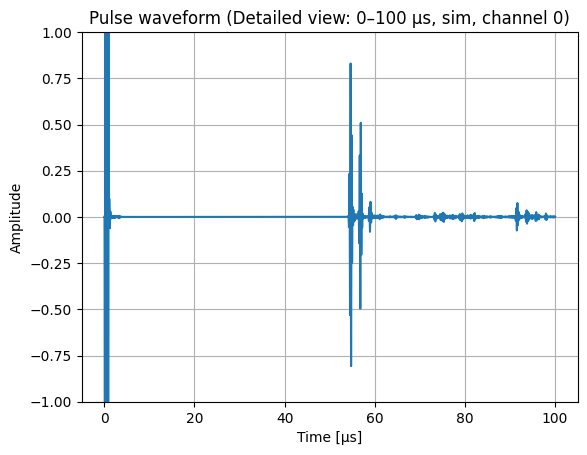

In [1]:
file_path = "/home/smatsubara/documents/airlift/data/simulation/rawsignal/solid12.mat"
import numpy as np
import matplotlib.pyplot as plt
import h5py
sim_signal=h5py.File(file_path, 'r')
print(sim_signal.keys())
sensor_data=sim_signal['sensor_data']
print(sensor_data.shape)
fs = 1/(100e-6) *len(sensor_data[:,16])
N_sim=len(sensor_data[:,16])
t_sim = np.arange(N_sim) *1e-3
print(t_sim.shape)
condition="sim"
# Plot the signal in detail from 50 μs to 90 μs
start_time_us = 0  # Start 
end_time_us = 100   # End 

# Find the indices corresponding to the desired time window
start_idx = np.searchsorted(t_sim, start_time_us)
end_idx = np.searchsorted(t_sim, end_time_us)

plt.plot(t_sim[start_idx:end_idx], sensor_data[start_idx:end_idx, 16]*0.4e-4)
plt.title(f"Pulse waveform (Detailed view: {start_time_us}–{end_time_us} μs, {condition}, channel 0)")
plt.xlabel("Time [μs]")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

(1001, 1)


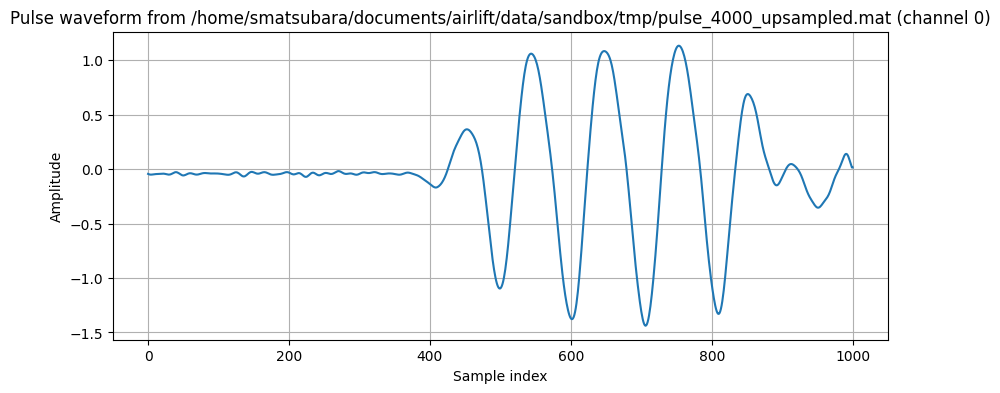

In [3]:
def plot_mat_pulse(file_path, channel_index=0):
    """
    Load and plot pulse data from a .mat file.

    Parameters:
    file_path (str): Path to the .mat file.
    channel_index (int): Index of the channel to plot.
    """
    import scipy.io
    import matplotlib.pyplot as plt
    import numpy as np

    # Load the .mat file
    try:
        mat_data = scipy.io.loadmat(file_path)
    except Exception as e:
        print(f"Failed to load .mat file: {e}")
        return

    # Try to find the pulse data key
    pulse_key = None
    for key in mat_data.keys():
        if 'pulse' in key.lower():
            pulse_key = key
            break

    if pulse_key is None:
        print("Pulse data not found in the .mat file.")
        return

    pulse_data = mat_data[pulse_key]
    print(pulse_data.shape)
    # If the data is 2D, select the specified channel
    if pulse_data.ndim == 2:
        if channel_index >= pulse_data.shape[1]:
            print(f"Channel index {channel_index} out of range.")
            return
        y = pulse_data[:, channel_index]
    else:
        y = pulse_data.squeeze()

    x = np.arange(len(y))

    plt.figure(figsize=(10, 4))
    plt.plot(x, y)
    plt.title(f"Pulse waveform from {file_path} (channel {channel_index})")
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

# Example usage:
plot_mat_pulse("/home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4000_upsampled.mat", channel_index=0)


In [14]:
def upsample_mat_pulse(file_path, channel_index=0, upsample_factor=8, output_path=None):
    """
    Upsample the pulse data in a .mat file by a specified factor and save the result.

    Parameters
    ----------
    file_path : str
        Path to the input .mat file.
    channel_index : int, optional
        Index of the channel to upsample (default is 0).
    upsample_factor : int, optional
        The upsampling factor (default is 8).
    output_path : str, optional
        Path to save the upsampled data as a .mat file. If None, the file will not be saved.

    Returns
    -------
    upsampled_y : np.ndarray
        The upsampled pulse data.
    """
    import scipy.io
    import numpy as np
    from scipy.signal import resample_poly

    # Load the .mat file
    try:
        mat_data = scipy.io.loadmat(file_path)
    except Exception as e:
        print(f"Failed to load .mat file: {e}")
        return None

    # Find the pulse data key
    pulse_key = None
    for key in mat_data.keys():
        if 'pulse' in key.lower():
            pulse_key = key
            break

    if pulse_key is None:
        print("Pulse data not found in the .mat file.")
        return None

    pulse_data = mat_data[pulse_key]
    # If the data is 2D, select the specified channel
    if pulse_data.ndim == 2:
        if channel_index >= pulse_data.shape[1]:
            print(f"Channel index {channel_index} out of range.")
            return None
        y = pulse_data[:, channel_index]
    else:
        y = pulse_data.squeeze()

    # Upsample using resample_poly
    upsampled_y = resample_poly(y, upsample_factor, 1)
    # If the length of upsampled_y is 1000, forcibly add one element to make it 1001
    if len(upsampled_y) == 1000:
        # Add the last value again to the end
        upsampled_y = np.append(upsampled_y, upsampled_y[-1])
    # Save the upsampled data if output_path is specified
    if output_path is not None:
        # Save as a 2D array for compatibility
        scipy.io.savemat(output_path, {f"{pulse_key}_upsampled": upsampled_y.reshape(-1, 1)})
        print(f"Upsampled data saved to {output_path}")

    return upsampled_y

# Example usage:
upsampled = upsample_mat_pulse("/home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4000.mat", channel_index=0, upsample_factor=8, output_path="/home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4000_upsampled.mat")


Upsampled data saved to /home/smatsubara/documents/airlift/data/sandbox/tmp/pulse_4000_upsampled.mat
